### Introduction to Time Series Example 3.4:
In this example we study again the air quality data. We have hourly measurements of several sensors, where we now focus on the air temperature. 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
AirQ = pd.read_csv('./data/AirQualityUCI.csv', parse_dates=True, decimal=",", sep=';')

# Create pandas DateTimeIndex
# Combine Date and Time Columns:
AirQ["Time"] = AirQ["Time"].str.replace(".", ":")
AirQ["Date"] = pd.to_datetime(AirQ["Date"] + " " + AirQ["Time"])
dtindex = pd.DatetimeIndex(data=pd.to_datetime(AirQ["Date"]), 
                           freq='infer')
# Set as Index
AirQ.set_index(dtindex, inplace=True)
AirQ.drop(["Date", "Time"], axis=1, inplace=True)

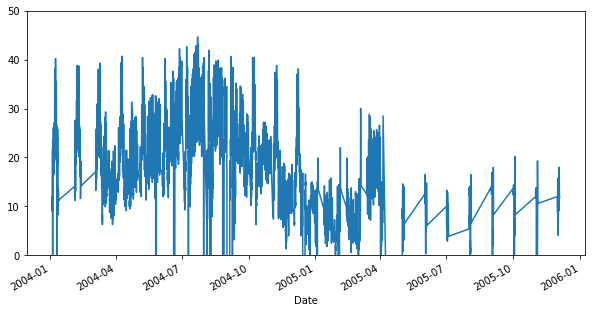

In [5]:
# Plots
fig, ax = plt.subplots(figsize=(10, 5))
AirQ["T"].plot(ax=ax)
ax.set_ylim(0, 50)
plt.show()

In this global plot the seasonality over one year becomes visible, but the details of the series (such as daily seasonal effects) are hidden by the limited display space of a A4 page. The **ylim** option limits the temperature axis to nonnegative values. There are some spikes going to $-200$ which have to be interpreted as sensor faults. 

We focus on a period of 20 days to analyse the temperature behaviour in more detail.

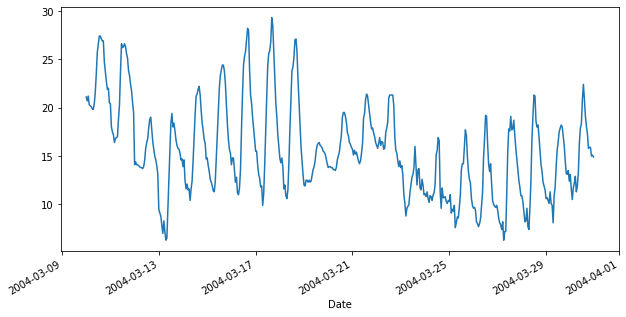

In [6]:
# From now on, only focus on 20 days
AirQ = AirQ.loc["2004-3-10":"2004-3-30"]
# Plot only detail:
fig, ax = plt.subplots(figsize=(10, 5))
AirQ["T"].plot(ax=ax)
plt.show()

## 

## Introduction to Time Series Example 3.5:


We consider the air quality data. The time series `AirQ` contains the hourly air temperature for a period of 20 consecutive days in March 2014 in an Italian city. We are going to generate a boxplot for each full hour in one figure. To this end, the attribute `index.hour` is very convenient: it returns the hour for every index. For the time being, we use the output of `.hour` as a grouping variable, e.g. for the `boxplot` function. The ouput of the following code snippet is shown.

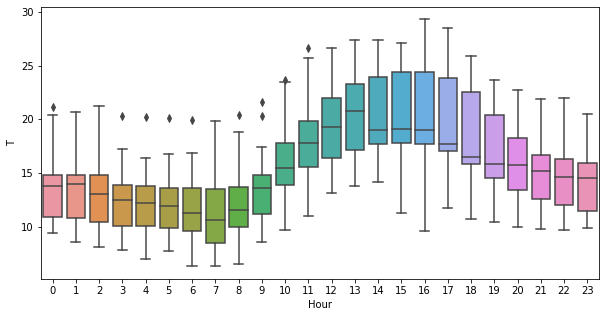

In [7]:
import seaborn as sns

# Plot using Seaborn
fig, ax = plt.subplots(figsize=(10, 5))
AirQ['Hour'] = AirQ.index.hour
sns.boxplot(data=AirQ, x='Hour', y="T")

plt.show()

### Introduction to Time Series Example 3.6:
We consider again the 20 day sequence of hourly air temperature measurements. We apply the `shift`
 function to create the shifted data, and plot these with respect to the original.

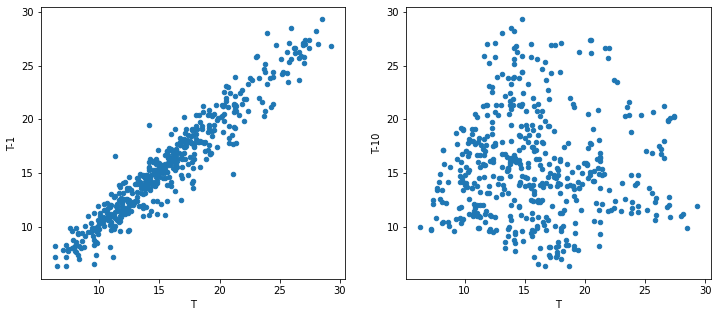

In [8]:
# Shift data
AirQ["T-1"] = AirQ["T"].shift(1)
AirQ["T-10"] = AirQ["T"].shift(10)

# Plot scatterplots
fig, ax = plt.subplots(figsize=(12, 5), ncols=2)

AirQ.plot(x="T", y="T-1", ax=ax[0], kind='scatter')
AirQ.plot(x="T", y="T-10", ax=ax[1], kind='scatter')

plt.show()

As it can be seen, the scatterplot with lag $1$ shows a linear pattern which indicates a correlation between subsequent hourly air temperatures. A lag of $10$ hours, however, results in a rather unspecific scatter plot.  